In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

from vector import Vector, print_Vector
from line import Line
from line_vortex import biot_savart

In [2]:
# the eddy
p1 = Vector(0, -0.5, 0)
p2 = Vector(1, -0.5, 1)
p3 = Vector(1,  0.5, 1)
p4 = Vector(0,  0.5, 1)
l1 = Line(p1, p2)
l2 = Line(p2, p3)
l3 = Line(p3, p4)

# mirror eddy
p1_mirror = p1
p2_mirror = Vector(1, -0.5, -1)
p3_mirror = Vector(1,  0.5, -1)
p4_mirror = p4

l1_mirror = Line(p2_mirror, p1_mirror)
l2_mirror = Line(p3_mirror, p2_mirror)
l3_mirror = Line(p4_mirror, p3_mirror)

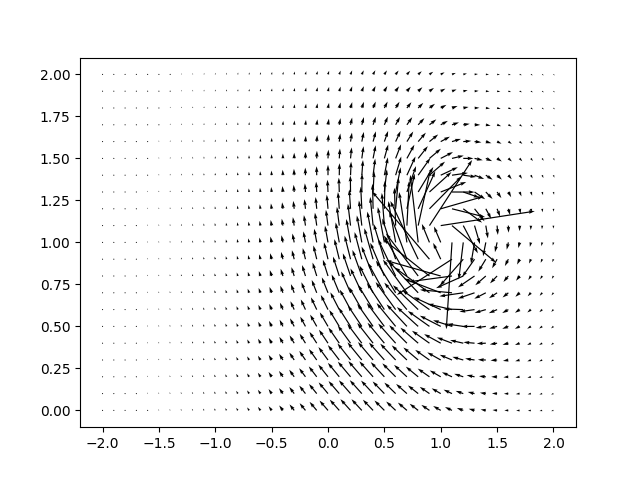

In [3]:
n = 41
x = np.linspace(-2, 2, n)
z = np.linspace( 0, 2, n//2 + 1)
X, Z = np.meshgrid(x, z, indexing='ij')

us = np.zeros_like(X)
vs = np.zeros_like(X)
ws = np.zeros_like(X)

for i in range(n):
    for k in range(n//2 + 1):
        xv = Vector(X[i, k], 0.0, Z[i, k])
        uvv1 = biot_savart(xv, l1)
        uvv2 = biot_savart(xv, l2)
        uvv3 = biot_savart(xv, l3)
        
        uvv = uvv1 + uvv2 + uvv3
        
        us[i, k], vs[i, k], ws[i, k] = uvv.ravel()
plt.figure()
plt.quiver(X, Z, us, ws)

In [16]:
n = 41
x = np.linspace(-2, 2, n)
z = np.linspace( 0, 2, n//2 + 1)
X, Z = np.meshgrid(x, z, indexing='ij')

us = np.zeros_like(X)
vs = np.zeros_like(X)
ws = np.zeros_like(X)

for i in range(n):
    for k in range(n//2 + 1):
        xv = Vector(X[i, k], 0.0, Z[i, k])
        uvv1 = biot_savart(xv, l1) + biot_savart(xv, l1_mirror)
        uvv2 = biot_savart(xv, l2) + biot_savart(xv, l2_mirror)
        uvv3 = biot_savart(xv, l3) + biot_savart(xv, l3_mirror)
        
        uvv = uvv2 # uvv1 + uvv2 + uvv3
        
        us[i, k], vs[i, k], ws[i, k] = uvv.ravel()

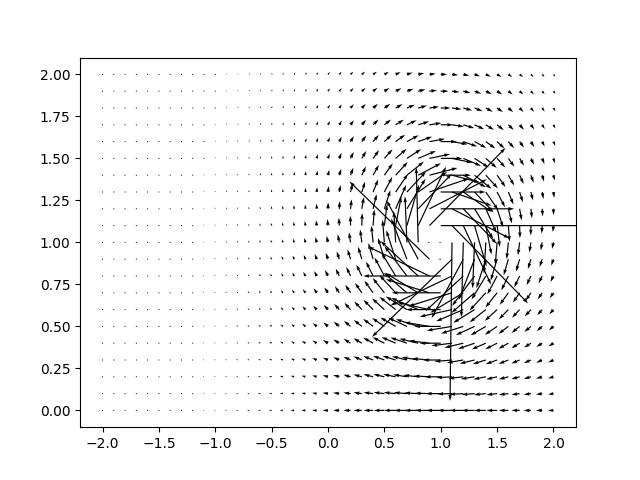

In [17]:
plt.figure()
plt.quiver(X, Z, us, ws)

In [18]:
ws[:, 0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.])